# Sentiment Analysis 

In [ ]:
pip install textblob

In [8]:
import pandas as pd
import zipfile
import os
import nltk
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import re
from nltk.stem import WordNetLemmatizer

In [2]:
# Download stopwords if you haven't already
nltk.download('stopwords')

# Define the zip file path
zip_file_path = 'Sentiment_140.zip'

# Step 1: Extract the dataset from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('Sentiment_140_data')  # Extracting to a folder

# Load the CSV data into a pandas DataFrame
csv_file_name = os.path.join('Sentiment_140_data', 'training.1600000.processed.noemoticon.csv')
df = pd.read_csv(csv_file_name, encoding='latin-1', header=None)

# Assign meaningful column names
df.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']

# Display the first few rows and the columns of the dataset
print(df.head())
print("Columns in the DataFrame:", df.columns.tolist())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Sentiment          ID                          Date     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              User                                              Tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Columns in the DataFrame: ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']


In [3]:
# Explore the dataset to understand its structure, including features such as text content, sentiment labels, and any additional metadata.
# Visualize the distribution of sentiments (positive, negative, neutral).

In [4]:
# Data Preprocessing

In [5]:
# Define a function for text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Normalize text (lowercasing)
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply the cleaning function to the tweets
df['cleaned_text'] = df['Tweet'].apply(clean_text)  # Use the correct column name

# Check the cleaned text
print(df[['Tweet', 'cleaned_text']].head())

                                               Tweet  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save 50 rest go ...  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


In [9]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply lemmatization to the cleaned text
df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

# Check the cleaned and lemmatized text
print(df[['Tweet', 'cleaned_text', 'lemmatized_text']].head())

# Encode sentiment labels (assuming sentiment is in the first column)
df['sentiment'] = df['Sentiment'].map({0: 'negative', 4: 'positive'})  # Map sentiment labels

# Convert sentiment to binary values (0 for negative, 1 for positive)
df['sentiment_binary'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Display the final DataFrame with sentiment labels
print(df[['Tweet', 'cleaned_text', 'lemmatized_text', 'sentiment', 'sentiment_binary']].head())

                                               Tweet  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  \
0      thats bummer shoulda got david carr third day   
1  upset cant update facebook texting might cry r...   
2  dived many times ball managed save 50 rest go ...   
3                   whole body feels itchy like fire   
4                           behaving im mad cant see   

                                     lemmatized_text  
0      thats bummer shoulda got david carr third day  
1  upset cant update facebook texting might cry r...  
2  dived many time ball managed save 50 rest go b...  
3                    whole body feel itchy like fire  
4                           behaving im mad cant se

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Build the model

In [21]:
import zipfile
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import nltk

# Step 1: Extract GloVe embeddings
zip_file_path = 'glove.6B.100d.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('glove_data')  # Extracting to a folder

glove_file_path = 'glove_data/glove.6B.100d.txt'  # Ensure this path is correct

# Function to load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load GloVe embeddings
embeddings_index = load_glove_embeddings(glove_file_path)

# Prepare data for model training
X = df['lemmatized_text']
y = df['sentiment_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
X_train_tokens = [tokenizer.tokenize(text) for text in X_train]
X_test_tokens = [tokenizer.tokenize(text) for text in X_test]

# Create a word index and limit vocabulary size
max_words = 10000  # Limit vocabulary size to 10,000
word_counts = {}

# Count words for word index
for tokens in X_train_tokens:
    for word in tokens:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Sort the words by frequency and create a word index
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
word_index = {word[0]: i + 1 for i, word in enumerate(sorted_words[:max_words])}  # Start indexing from 1

# Define maximum words and create an embedding matrix
embedding_matrix = np.zeros((max_words + 1, 100))  # +1 for the 0 index

# Populate the embedding matrix
for word, i in word_index.items():
    if i <= max_words:  # Ensure index is within limits
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Convert texts to sequences, ensuring we stay within bounds
X_train_sequences = [[word_index.get(word, 0) for word in tokens] for tokens in X_train_tokens]
X_test_sequences = [[word_index.get(word, 0) for word in tokens] for tokens in X_test_tokens]

# Pad sequences to ensure uniform input size
max_sequence_length = 100  # Max length of input sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                    output_dim=embedding_matrix.shape[1], 
                    weights=[embedding_matrix], 
                    trainable=False))  # Use pre-trained GloVe embeddings
model.add(LSTM(128, return_sequences=True))  # LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(64))  # Another LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, 
                    validation_data=(X_test_padded, y_test), 
                    epochs=10, 
                    batch_size=64, 
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1284s 64ms/step - accuracy: 0.7479 - loss: 0.5083 - val_accuracy: 0.7829 - val_loss: 0.4562
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1361s 68ms/step - accuracy: 0.7847 - loss: 0.4535 - val_accuracy: 0.7884 - val_loss: 0.4477
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1476s 74ms/step - accuracy: 0.7936 - loss: 0.4392 - val_accuracy: 0.7921 - val_loss: 0.4417
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1542s 77ms/step - accuracy: 0.7983 - loss: 0.4312 - val_accuracy: 0.7924 - val_loss: 0.4411
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1599s 80ms/step - accuracy: 0.8034 - loss: 0.4226 - val_accuracy: 0.7932 - val_loss: 0.4400
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1630s 82ms/step - accuracy: 0.8061 - loss: 0.4173 - val_accuracy: 0.7921 - val_loss: 0.4419
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1696s 85ms/step - accuracy: 0.8099 - loss: 0.4111 - val_accuracy: 0.7934 - val_loss: 0.4401
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 1733

In [ ]:
# Visualize the Data

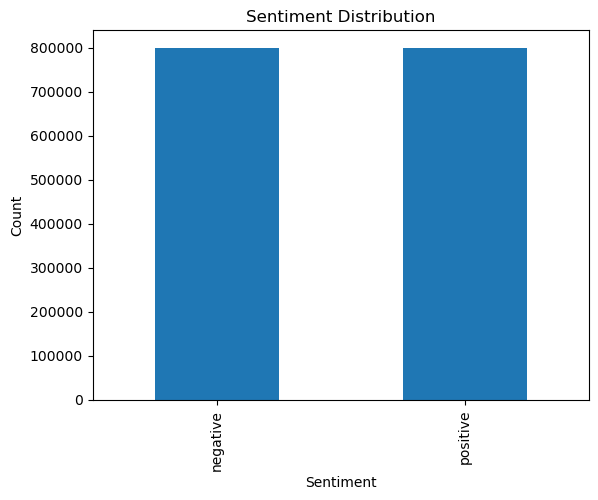

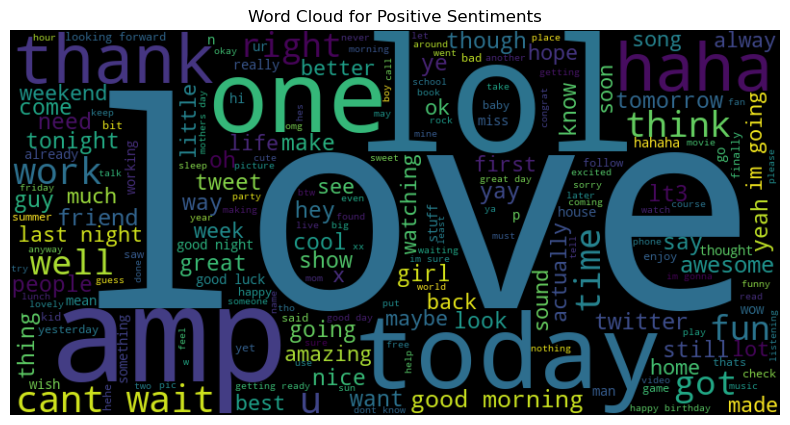

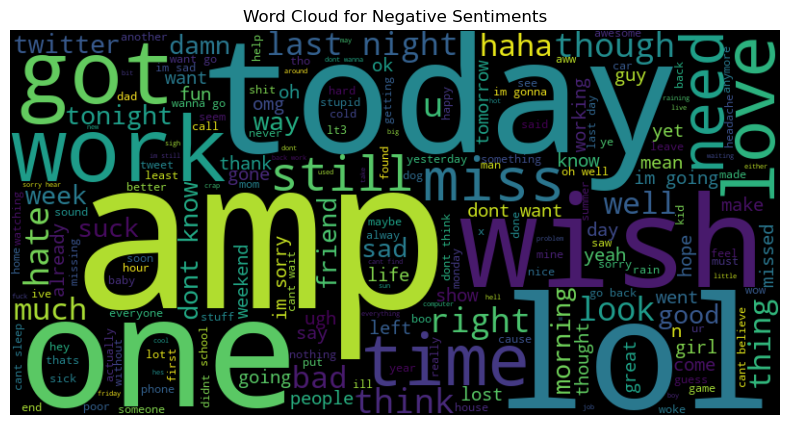

In [22]:
# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution', xlabel='Sentiment', ylabel='Count')
plt.show()

# Create word clouds
positive_tweets = df[df['sentiment'] == 'positive']['cleaned_text'].str.cat(sep=' ')
negative_tweets = df[df['sentiment'] == 'negative']['cleaned_text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

wordcloud_negative = WordCloud(width=800, height=400).generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

In [ ]:
# Analyze Model Performance

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 160s 16ms/step


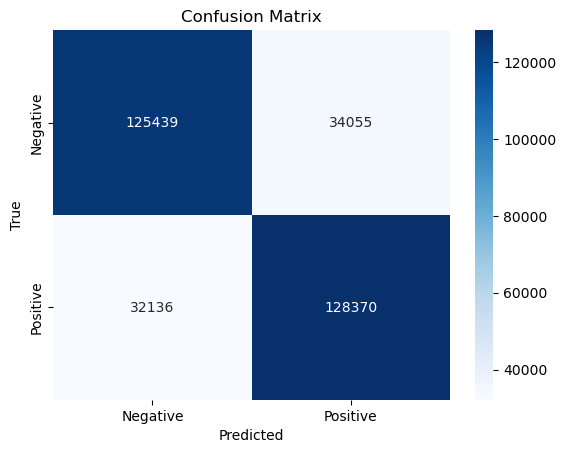

              precision    recall  f1-score   support

           0       0.80      0.79      0.79    159494
           1       0.79      0.80      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_binary))

In [ ]:
# https://www.kaggle.com/datasets/kazanova/sentiment140